In [88]:
import pandas as pd
import os as os
import numpy as np
os.getcwd()
training = pd.read_csv('Data.csv')
training = training.drop(columns =['row ID'])

In [89]:
print(training.shape)
#print(data.head())

(2783, 132)


In [90]:
#low variance filter  and normalization
from sklearn.preprocessing import normalize  
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import silhouette_samples, silhouette_score

In [91]:
#low variance filter
varthreshold=VarianceThreshold(threshold=0)
varthreshold.fit(training)
variablestokeep=varthreshold.get_feature_names_out()
print(variablestokeep)
print(len(variablestokeep))
training=training[variablestokeep]
print(training.shape)

['itching' 'skin_rash' 'chills' 'joint_pain' 'stomach_pain' 'acidity'
 'ulcers_on_tongue' 'vomiting' 'fatigue' 'weight_gain'
 'cold_hands_and_feets' 'mood_swings' 'weight_loss' 'restlessness'
 'lethargy' 'cough' 'high_fever' 'sunken_eyes' 'breathlessness' 'sweating'
 'dehydration' 'indigestion' 'headache' 'yellowish_skin' 'dark_urine'
 'nausea' 'loss_of_appetite' 'back_pain' 'abdominal_pain' 'diarrhoea'
 'mild_fever' 'yellow_urine' 'yellowing_of_eyes' 'acute_liver_failure'
 'swelling_of_stomach' 'swelled_lymph_nodes' 'malaise'
 'blurred_and_distorted_vision' 'phlegm' 'chest_pain' 'weakness_in_limbs'
 'fast_heart_rate' 'neck_pain' 'dizziness' 'puffy_face_and_eyes'
 'enlarged_thyroid' 'brittle_nails' 'swollen_extremeties'
 'excessive_hunger' 'knee_pain' 'hip_joint_pain' 'muscle_weakness'
 'stiff_neck' 'swelling_joints' 'movement_stiffness' 'spinning_movements'
 'loss_of_balance' 'unsteadiness' 'passage_of_gases' 'internal_itching'
 'depression' 'irritability' 'muscle_pain' 'abnormal_mens

In [92]:
#using correlation matrix to drop values
cor_matrix = training.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7) ]
print(to_drop)
training = training.drop(columns = to_drop)
print(training.shape)
#onehotencodedtraining.drop(to_drop,axis=1,inplace=True)

['ulcers_on_tongue', 'cold_hands_and_feets', 'breathlessness', 'sweating', 'dehydration', 'dark_urine', 'abdominal_pain', 'yellowing_of_eyes', 'malaise', 'phlegm', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'hip_joint_pain', 'unsteadiness', 'internal_itching', 'depression', 'irritability', 'abnormal_menstruation', 'rusty_sputum', 'visual_disturbances', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload (#1)', 'blood_in_sputum', 'painful_walking', 'blackheads', 'scurring', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'red_sore_around_nose', 'yellow_crust_ooze']
(2783, 46)


C:\Users\HP\AppData\Local\Temp\ipykernel_2900\3988550498.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [93]:
from sklearn.cluster import KMeans, AgglomerativeClustering
#kmeans = KMeans(n_clusters=15, random_state=100).fit(data.drop(columns =['row ID']))

In [94]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage



   itching  skin_rash  chills  joint_pain  stomach_pain  acidity  vomiting  \
0        0          0       0           0             1        1         1   
1        0          0       0           0             1        0         1   
2        0          0       0           0             1        1         1   
3        0          0       0           0             1        1         0   
4        0          0       0           0             1        1         1   

   fatigue  weight_gain  mood_swings  ...  movement_stiffness  \
0        0            0            0  ...                   0   
1        0            0            0  ...                   0   
2        0            0            0  ...                   0   
3        0            0            0  ...                   0   
4        0            0            0  ...                   0   

   spinning_movements  loss_of_balance  passage_of_gases  muscle_pain  \
0                   0                0                 0           

Text(0.5, 1.0, 'Elbow curve')

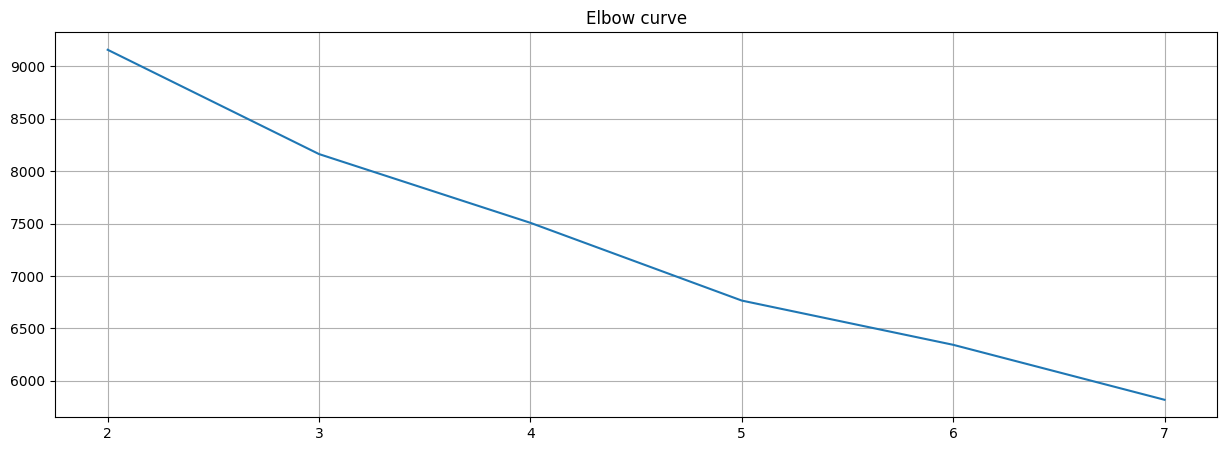

In [95]:
#using elbow plot to find the optimal number of clusters
print(training.head())
sse = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(training)
    sse.append(kmeans.inertia_)
print(sse)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 8), sse)
plt.grid(True)
plt.title('Elbow curve')

In [96]:
#running k means with 15 clusters
aggclust=AgglomerativeClustering(n_clusters=12, affinity='cosine', linkage='average')
aggclust.fit(training)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=11)

In [97]:
silhouetteavg=silhouette_score(training, aggclust.labels_)
print(silhouetteavg)

0.4140823519858191


In [98]:
# linked = linkage(training, 'average')

# labelList = range(1, 5)

# plt.figure(figsize=(10, 7))
# dendrogram(linked) ,
# # #            orientation='top',
# # #            labels=labelList,
# # #            distance_sort='descending',
# # #            show_leaf_counts=True)
# plt.show()

In [99]:
submission=pd.read_csv('submission.csv')
submission['cluster']=aggclust.labels_
submission.to_csv('submission.csv',index=False)